#importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
pd.options.display.max_rows = 300
dataFrame1 = pd.read_csv('Data/file1.csv')
dataFrame2 = pd.read_csv('Data/file2.csv')
dataFrame3 = pd.read_csv('Data/file3.csv')

In [2]:

pattern = re.compile(r"^(?:\\.|[^/\\])*/((?:\\.|[^/\\])*)/")

columns_options = {'ST': 'state',
                    'State': 'state',
                    'Gender': 'gender',
                    'GENDER': 'gender'}

state_replacing_options = {'California': 'West Region',
                        'Oregon': 'North West',
                        'Washington': 'East',
                        'Nevada': 'Central',
                        'Arizona': 'Central'}

dataFrame1.rename(columns=columns_options,
                        inplace=True, errors='ignore')

dataFrame2.rename(columns=columns_options,
                        inplace=True, errors='ignore')

dataFrame3.rename(columns=columns_options,
                        inplace=True, errors='ignore')

dataFrame = pd.concat([dataFrame1,dataFrame2,dataFrame3],axis=0,ignore_index=True)

In [3]:
dataFrame

,Customer,state,gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [4]:

dataFrame.columns = list(map(lambda h:h.lower().strip(),dataFrame.columns))

def string_to_float_int_convertor(data):
    if isinstance(data, str):
        data = data.replace('%','')
        return int(float(data))
    else:
        return data

dataFrame['customer lifetime value'] = dataFrame['customer lifetime value'].fillna(0)
dataFrame['customer lifetime value'] = list(map(string_to_float_int_convertor,dataFrame['customer lifetime value']))
dataFrame['number of open complaints'] = dataFrame['number of open complaints'].fillna(0)

def get_value_between_slashes(open_contract):
    if  isinstance(open_contract, str):
        return pattern.match(open_contract).group(1)
    else:
        return open_contract






    


Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
Removing duplicates

In [5]:
dataFrame['number of open complaints'] = list(map(get_value_between_slashes,dataFrame['number of open complaints']))
dataFrame['state'] = dataFrame['state'].fillna('not provided')
dataFrame['gender'] = dataFrame['gender'].fillna('not available')

In [6]:
dataFrame.describe()

,customer lifetime value,income,monthly premium auto,total claim amount
count,1.207400e+04,9137.000000,9137.000000,9137.000000
mean,1.377714e+05,37828.820291,110.391266,430.527140
std,3.914220e+05,30358.716159,581.376032,289.582968
min,0.000000e+00,0.000000,61.000000,0.099007
25%,2.236976e+03,0.000000,68.000000,266.996814
50%,5.334900e+03,34244.000000,83.000000,377.561463
75%,1.326809e+04,62447.000000,109.000000,546.420009
max,5.816655e+06,99981.000000,35354.000000,2893.239678


Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values) Hint: numpy.nan is considered of float64 data type.

In [7]:
numerical_value_df = dataFrame.select_dtypes(include=np.number)
numerical_value_df = numerical_value_df.columns

for numerical_column in numerical_value_df:
    print(dataFrame[numerical_column].mean())
    dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)

137771.41079082145
37828.820291124
110.3912662799606
430.5271400681818


In [8]:
dataFrame.describe()

,customer lifetime value,income,monthly premium auto,total claim amount
count,1.207400e+04,9137.000000,9137.000000,9137.000000
mean,1.713642e+05,47326.392114,110.391266,430.527140
std,3.839976e+05,21728.245194,581.376032,289.582968
min,1.898008e+03,10037.000000,61.000000,0.099007
25%,5.279143e+03,34337.000000,68.000000,266.996814
50%,1.276253e+04,37828.820291,83.000000,377.561463
75%,1.377714e+05,62447.000000,109.000000,546.420009
max,5.816655e+06,99981.000000,35354.000000,2893.239678


#Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [9]:
def state_replacer(state):
    if state in state_replacing_options:
        return state_replacing_options[state]
    else:
        return state

dataFrame['state'] = list(map(state_replacer,dataFrame['state']))

dataFrame['state']

0               East
1            Central
2            Central
3        West Region
4               East
            ...     
12069    West Region
12070    West Region
12071    West Region
12072    West Region
12073    West Region
Name: state, Length: 12074, dtype: object

#Day 3
Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [55]:
numerical = dataFrame.select_dtypes(include= np.number)

categorical = dataFrame.select_dtypes(include= np.object)


C:\Users\user\AppData\Local\Temp\ipykernel_15204\131610644.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = dataFrame.select_dtypes(include= np.object)


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution

C:\Users\user\.conda\envs\DA_Env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


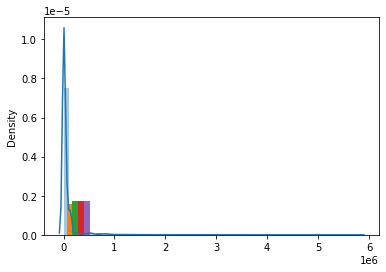

NameError: name 'variance_inflation_factor' is not defined

In [60]:
sns.distplot(numerical)
plt.hist(numerical, density=True)
plt.show()

#variance_inflation_factor(numerical['total claim amount'])


In [10]:
dataFrame

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,East,not available,Master,1.377714e+05,37828.820291,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Central,F,Bachelor,6.979530e+05,37828.820291,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,F,Bachelor,1.288743e+06,48767.000000,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West Region,M,Bachelor,7.645860e+05,37828.820291,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,M,High School or Below,5.363070e+05,36357.000000,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,West Region,M,Bachelor,2.340599e+04,71941.000000,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,West Region,F,College,3.096511e+03,21604.000000,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,West Region,M,Bachelor,8.163890e+03,37828.820291,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,West Region,M,College,7.524442e+03,21941.000000,96.0,0,Personal Auto,Four-Door Car,691.200000
